# IRIS

In [10]:
# 패키지 불러오기
import sys, warnings
# sys.path.append("Y:\Python\Mega_IT")
warnings.filterwarnings('ignore')

# from yjk_module.preprocessing import *
# from yjk_module.ml_module import *
# from yjk_module.dl_module import *

# from hossam.util import *
# from hossam.plot import *
# from hossam.tensor import *
# from hossam.classification import *

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, Callback, History
from keras.utils import to_categorical

In [3]:
# 데이터 로드
origin1 = pd.read_excel("./data/iris.xlsx")
origin1.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
# 데이터 전처리 수행
# pp = YjkPreprocessor()
# pp.set_strategy(outline = None)
# df_p = pp.fit_transform(origin1, yname = "Species", ylabeling = True)

df = origin1.copy()

cols_n = df.select_dtypes('number').columns
ss = StandardScaler()
df[cols_n] = ss.fit_transform(df[cols_n])

le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


In [8]:
# 독립변수 / 종속변수 분리
X = df.copy()
Y = X.pop("Species")

X.shape, Y.shape

((150, 4), (150,))

In [9]:
# 종속변수 원핫인코딩
y_cate = to_categorical(Y)
y_cate[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [11]:
# 훈련 / 검증 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(X, y_cate, test_size = 0.2, random_state = 0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [13]:
# 독립변수 컬럼수 / 종속변수 클래스 수 추출
cols = x_train.shape[1]
classes = len(y_cate[0])
print(cols, classes)

4 3


In [12]:
# kh = YjkKerasHelper('c')

In [14]:
# Keras 모델 생성
model = Sequential([
    Dense(64, activation = 'relu', input_shape = (cols,)),
    Dense(classes, activation = 'softmax')
])
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = 'accuracy')

2024-04-24 16:34:27.930630: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1031 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:08:00.0, compute capability: 8.6


In [15]:
%%time

# 모델 훈련
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 500, callbacks = [
    EarlyStopping(patience = 8, restore_best_weights = True)
])

Epoch 1/500
1/4 [======>.......................] - ETA: 1s - loss: 1.2226 - accuracy: 0.3438

2024-04-24 16:34:40.487126: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f337885d200 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-24 16:34:40.487146: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-04-24 16:34:40.491200: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-24 16:34:40.498068: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
I0000 00:00:1713944080.523819   34575 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4/4 [==============================] - 1s 44ms/step - loss: 1.1116 - accuracy: 0.3500 - val_loss: 0.9191 - val_accuracy: 0.6000
Epoch 2/500
4/4 [==============================] - 0s 6ms/step - loss: 0.9728 - accuracy: 0.4750 - val_loss: 0.8488 - val_accuracy: 0.7333
Epoch 3/500
4/4 [==============================] - 0s 6ms/step - loss: 0.8828 - accuracy: 0.5000 - val_loss: 0.7969 - val_accuracy: 0.7000
Epoch 4/500
4/4 [==============================] - 0s 6ms/step - loss: 0.8141 - accuracy: 0.6083 - val_loss: 0.7581 - val_accuracy: 0.6000
Epoch 5/500
4/4 [==============================] - 0s 6ms/step - loss: 0.7587 - accuracy: 0.7417 - val_loss: 0.7245 - val_accuracy: 0.6333
Epoch 6/500
4/4 [==============================] - 0s 6ms/step - loss: 0.7119 - accuracy: 0.8167 - val_loss: 0.6947 - val_accuracy: 0.6333
Epoch 7/500
4/4 [==============================] - 0s 6ms/step - loss: 0.6694 - accuracy: 0.8500 - val_loss: 0.6701 - val_accuracy: 0.6667
Epoch 8/500
4/4 [=====================

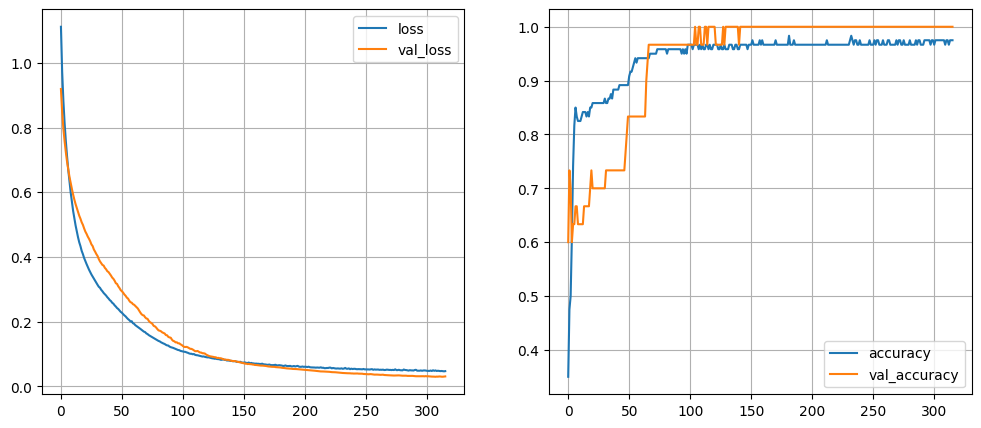

In [17]:
# 학습곡선 시각화
# yjk_dl_history_plot(history, metrics = 'accuracy')

hist_dict = history.history
fig, ax = plt.subplots(1, 2, figsize = (12, 5))

ax[0].plot(hist_dict['loss'], label = 'loss')
ax[0].plot(hist_dict['val_loss'], label = 'val_loss')
ax[0].grid()
ax[0].legend()

ax[1].plot(hist_dict['accuracy'], label = 'accuracy')
ax[1].plot(hist_dict['val_accuracy'], label = 'val_accuracy')
ax[1].grid()
ax[1].legend()

plt.show()

In [18]:
# 검증 데이터 손실율 및 정확도 산출
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 13ms/step - loss: 0.0297 - accuracy: 1.0000


[0.0296856090426445, 1.0]